In [58]:
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
# Upload the file
uploaded = files.upload()

Saving online_retail_customer_churn.csv to online_retail_customer_churn (7).csv


In [60]:
# Get the file name
file_name = list(uploaded.keys())[0]
print(f'Uploaded file: {file_name}')

Uploaded file: online_retail_customer_churn (7).csv


In [61]:
# Read the CSV file into a DataFrame
df = pd.read_csv(file_name)

In [62]:
# Define the feature variables (X) and the target variable (y)
X = df.drop(columns=['Customer_ID', 'Target_Churn'])
y = df['Target_Churn']

In [63]:
# Convert categorical variables to numeric if necessary
X = pd.get_dummies(X, columns=['Gender', 'Promotion_Response'], drop_first=True)

In [85]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)


In [86]:

# Standardize the data for the neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy of Logistic Regression:", accuracy_logistic)

Accuracy of Logistic Regression: 0.48428571428571426


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(70, 30), max_iter=950, random_state=42)
nn_model.fit(X_train_scaled, y_train)
y_pred_nn = nn_model.predict(X_test_scaled)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy of Neural Network:", accuracy_nn)

Accuracy of Neural Network: 0.5057142857142857


In [89]:
# Boosting Ensemble (Gradient Boosting Classifier)
boosting_model = GradientBoostingClassifier(n_estimators=90, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print("Accuracy of Boosting Ensemble (Gradient Boosting Classifier):", accuracy_boosting)

Accuracy of Boosting Ensemble (Gradient Boosting Classifier): 0.49714285714285716


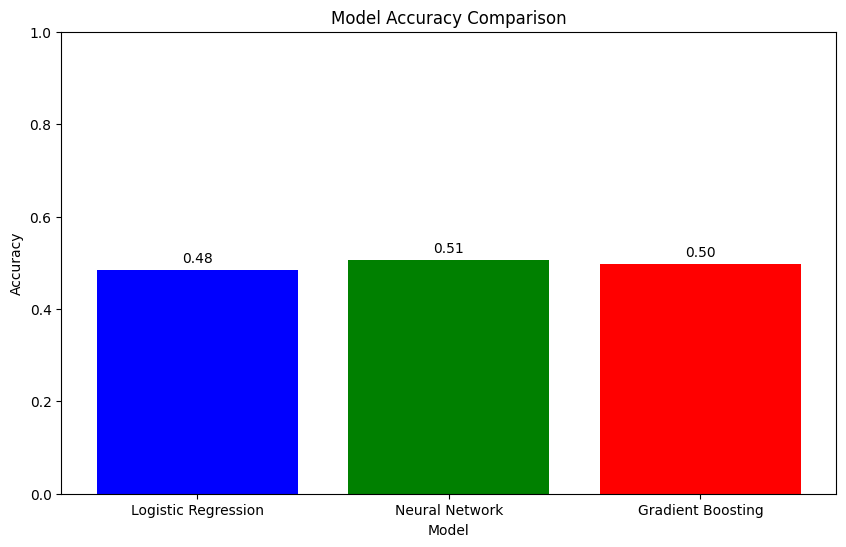

In [90]:
import matplotlib.pyplot as plt

# Plotting the accuracies
models = ['Logistic Regression', 'Neural Network', 'Gradient Boosting']
accuracies = [accuracy_logistic, accuracy_nn, accuracy_boosting]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()